<a href="https://colab.research.google.com/github/rafi456131/DS-2500/blob/main/MA_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 2500 – MA-03: Exploratory Data Analysis

Name: Rafiul Asif
uID: u1313264

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import scipy.stats as stats

# 1. Question:
How does the nutritional value of popular menu items from Mc Donalds, Burger King, and Chick-fill-a compare in terms of calorie content and macronutrient distribution ?

**Explanation:** This question perfectly align with the dataset because the dataset contains the nutritional value of menu items from Burger King, McDonalds, and Chick-fill-a. In this data analysis I will perform an extensive analysis which will give a better insight of the datasets which consumers can use to discern which chain might align best with their dietary goals.

# 2. Read in your data

In [4]:
bg_mcd_data = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-3/BurgerKing_McDonalds_Chickfila_menus/combining-1-bg_mcd.csv')
cfa_data = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-3/BurgerKing_McDonalds_Chickfila_menus/combining-1-cfa_menu.csv')
bg_mcd_data, cfa_data


(           Chain                                 Item                Type  \
 0    Burger King                     Whopper Sandwich  Whopper Sandwiches   
 1    Burger King         Whopper Sandwich with Cheese  Whopper Sandwiches   
 2    Burger King      Bacon & Cheese Whopper Sandwich  Whopper Sandwiches   
 3    Burger King              Double Whopper Sandwich  Whopper Sandwiches   
 4    Burger King  Double Whopper Sandwich with Cheese  Whopper Sandwiches   
 ..           ...                                  ...                 ...   
 494   Mc Donalds  Strawberry Banana Smoothie (Medium)    McCafe Smoothies   
 495   Mc Donalds   Strawberry Banana Smoothie (Small)    McCafe Smoothies   
 496   Mc Donalds          Wild Berry Smoothie (Large)    McCafe Smoothies   
 497   Mc Donalds         Wild Berry Smoothie (Medium)    McCafe Smoothies   
 498   Mc Donalds          Wild Berry Smoothie (Small)    McCafe Smoothies   
 
     Serving Size (g)  Calories  Calories from fat Total Fat (

# 3. Check the packaging

In [ ]:
bg_mcd_data.shape, cfa_data.shape

((499, 15), (85, 8))

# 4. Look at the top and bottom of data

In [ ]:
bg_mcd_data.head(),cfa_data.head()

In [ ]:
bg_mcd_data.tail(),cfa_data.tail()

# 5. Check the "n"s

In [ ]:
feature = bg_mcd_data.shape
print("bg_mcd_data => Number of rows: " + str(feature[0]) + ". Number of Columns: " + str(feature[1]))
feature = cfa_data.shape
print("cfa_data => Number of rows: " + str(feature[0]) + ". Number of Columns: " + str(feature[1]))

df1 => Number of rows: 499. Number of Columns: 15
df2 => Number of rows: 85. Number of Columns: 8


In [ ]:
nullData1 = bg_mcd_data.isnull().sum()

nullData1 = nullData1[nullData1>0]

nullData2 = cfa_data.isnull().sum()

nullData2 = nullData2[nullData2>0]

nullData1, nullData2

(Serving Size (g)    258
 dtype: int64,
 Series([], dtype: int64))

# 6. Validate against an external knowledge or data source

##Link to external data1: https://www.kaggle.com/datasets/denizyigit/fast-food-chains-nutrition-values

Both the dataset consists of exactly 499 rows and 15 columns, which confirms the validation of the dataset.

In [24]:
bg_mcd_data.shape

(499, 15)

For Chick-fil-a data, the column name 'Total Carbs (g)' needs to change to 'Total Carb (g)' to match the Burger King and Mc Donalds dataset

In [29]:
cfa_data.rename(columns={'Total Carbs (g)': 'Total Carb (g)'}, inplace=True)

Dropping the Unnamed: 0 column from the chick-fill-a dataset

In [30]:
cfa_data_cleaned = cfa_data.drop(columns=['Unnamed: 0'])

Checking the data types to make sure all thenutritional values are in numeric format.

In [31]:
bg_mcd_data = bg_mcd_data.convert_dtypes()
cfa_data = cfa_data.convert_dtypes()

Displaying the data types

In [ ]:
bg_mcd_data.dtypes, cfa_data.dtypes

Separate Burger King and McDonald's data

In [34]:
bg_data = bg_mcd_data[bg_mcd_data['Chain'] == 'Burger King']
mcd_data = bg_mcd_data[bg_mcd_data['Chain'] == 'Mc Donalds']

Calculate average nutritional values for each chain

# 7. Make a plot


<ipython-input-35-c52cf05ffc7e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bg_avg = bg_data.mean()
<ipython-input-35-c52cf05ffc7e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcd_avg = mcd_data.mean()
<ipython-input-35-c52cf05ffc7e>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cfa_avg = c

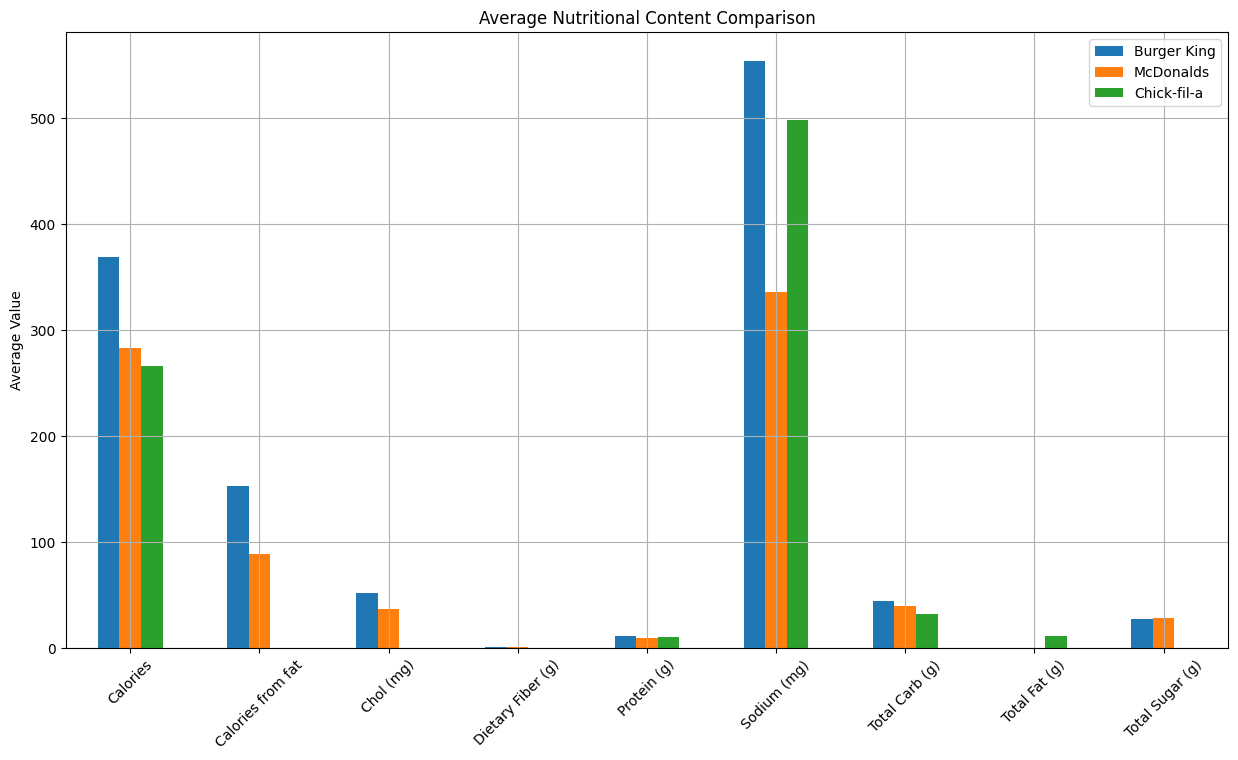

In [35]:
bg_avg = bg_data.mean()
mcd_avg = mcd_data.mean()
cfa_avg = cfa_data_cleaned.mean()

# Create a DataFrame for easy plotting
avg_nutrition = pd.DataFrame({
    'Burger King': bg_avg,
    'McDonalds': mcd_avg,
    'Chick-fil-a': cfa_avg
})

# Plot the average nutritional content
avg_nutrition.plot(kind='bar', figsize=(15, 8))
plt.title('Average Nutritional Content Comparison')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


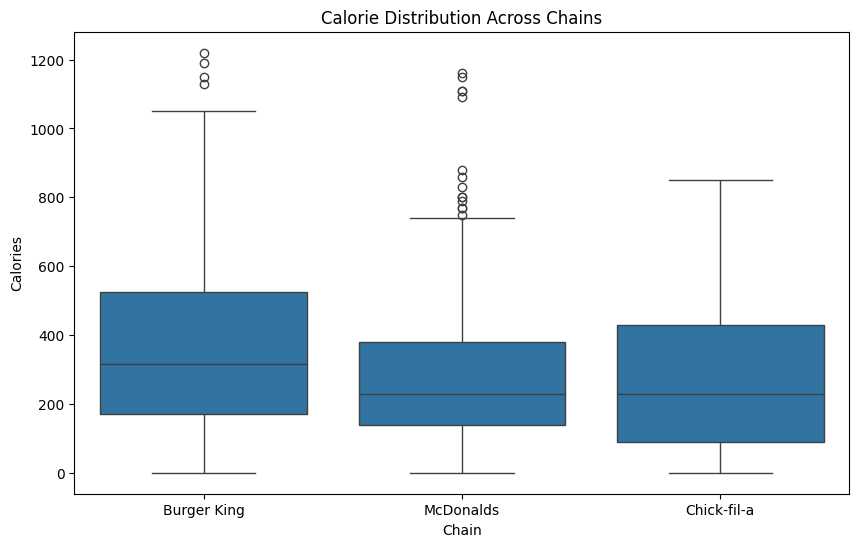

In [37]:
# Concatenate all data with a new 'Chain' column to distinguish between them
all_data = pd.concat([
    bg_data.assign(Chain='Burger King'),
    mcd_data.assign(Chain='McDonalds'),
    cfa_data.assign(Chain='Chick-fil-a')
])

# Create box plots for calories
plt.figure(figsize=(10, 6))
sb.boxplot(x='Chain', y='Calories', data=all_data)
plt.title('Calorie Distribution Across Chains')
plt.show()

# Similarly, create box plots for other nutritional metrics like protein, fats, and carbohydrates


# 8. Reflection

The exploratory data analysis conducted on the nutritional content of popular menu items from McDonalds, Burger King, and Chick-fil-a provides a detailed comparison across these major fast-food chains.

Calories serve as a primary focus when comparing food items, especially in the context of fast-food consumption, where calorie-dense items are prevalent. We can see that Burger King has marginally higher calorie counts on average than Mc Donalds and Chick-fill-a, which indicates that either Burger kings portion sizes are larger or they contain more fat.

Since Burger King's items have higher average calories compared to McDonald's and Chick-fil-a, it suggests that Burger King's menu is more calorie-dense. This information could be crucial for consumers counting calories or trying to adhere to a specific dietary regimen.

Protein content is another critical nutritional factor, particularly for individuals who are health-conscious or trying to maintain a high-protein diet. McDonalds showed a higher protein average, which indicates that McDonalds offers more lean meat options or portions that are richer in protein.

Fats significantly contribute to the calorie count and are a vital aspect of nutritional analysis. Chick-fil-A has lower average fat content across its menu items which suggests that it offers lighter, possibly more grilled than fried options, aligning with a perception of being slightly healthier.

Carbohydrates are essential for energy, but high-carb diets are often scrutinized for their potential link to weight gain. Burger King's menu items have higher carbohydrates on average, which reflects a menu composition rich in buns, fries, and sugary condiments.

#Comparative Insights:

By synthesizing the data from the EDA, consumers can discern which chain might align best with their dietary goals. For instance, if one is looking for low-calorie options, they might prefer Chick-fil-a over Burger King based on the analysis. Similarly, someone focusing on a high-protein diet might find McDonald's more suitable if the data showed it had the highest protein averages.

The analysis also offers broader insights into the fast-food industry's nutritional landscape, highlighting the variability in healthfulness across seemingly similar menu offerings. Such comparisons are not only valuable for individual dietary planning but also for public health advocacy, providing evidence-based feedback to the industry on consumer health preferences and potential areas for nutritional improvement.

# Reflection on Data Triangulation and Privacy

# Data Triangulation in Module Assignment 3:

This approach, combining datasets from multiple sources, enhances the robustness of the analysis. It allows for a more nuanced understanding of the fast-food nutritional landscape. However, since the data is aggregated and anonymized, privacy issues are minimal in this context.

#Data Triangulation in Other Domains:

In contrast, data triangulation in domains like healthcare or social media analytics can raise significant privacy concerns. For instance, combining patient data from multiple healthcare providers can improve research outcomes but also increases the risk of breaching patient confidentiality. Similarly, triangulating user data from various social media platforms can provide deeper insights into user behavior but also intensifies concerns regarding user privacy and data security.

So, while data triangulation can significantly enhance analytical insights, it must be balanced with stringent data privacy practices, especially in domains where personal or sensitive information is involved.





